In [1]:
""" Imports """

import re

import matplotlib.pyplot as plt
import pandas as pd
import nltk

nltk.download('book')
nltk.download('punkt') 
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

from nltk.corpus import PlaintextCorpusReader

from nltk.book import *
from nltk.text import Text as nltk_text_type

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/kapuchinka/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/kapuchinka/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/kapuchinka/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/kapuchinka/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/kapuchinka/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/kapuchinka/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nlt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Корпуса

In [2]:
corpus_root = './resources/text_files'
corpus = PlaintextCorpusReader(corpus_root, '.*')
corpus.fileids()

['Pride_and_Prejudice.txt', 'The_Picture_of_Dorian_Gray.txt']

### Список текстов book

In [3]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Модули для проведения экспериментов

### Статистический анализ текста
Проводим статический анализ текста, чтобы узнать его длину, размер словаря, и меру лексического многообразия

In [4]:
def static_analysis(text: nltk_text_type):
    text_length = len(text)
    dictionary_text = sorted(set(text))
    count_words_dictionary = len(dictionary_text)
    measure_lexical_diversity = count_words_dictionary / text_length
    
    return text_length, count_words_dictionary, measure_lexical_diversity

### Токенизация предложений
Проводим токенизацию предложений. То есть выделяем из всего текста отдельные предложения, чтобы в дальнейшем узнать их количество в тексте

In [5]:
def tokenization_sentences(text: nltk_text_type, language: str = 'english'):
    word_list = text.tokens
    text_stroke = " ".join(word_list)
    sentences = sent_tokenize(text_stroke, language)
    
    return sentences

### Токенизация слов
Проводим токенизацию слов. То есть выделяем из всего текста отдельные слова, откидывая все знаки препинания, которые в процессе образовались, чтобы в дальнейшем узнать количество слов в тексте

In [6]:
def tokenization_words(text: nltk_text_type, language: str = 'english'):
    word_list = text.tokens
    text_stroke = " ".join(word_list)
    words = word_tokenize(text_stroke, language)
    words_tokenize = [word for word in words if re.match(r'\w+', word)]   
    
    return words_tokenize

### Удаление стопслов
Из списка токенизированных слов убираем различные стопслова (служебные слова, предлоги, арктикли)

In [7]:
def remove_stopwords(words_tokenize, language: str = 'english'):
    stop_words = set(stopwords.words(language))
    words_without_stopwords = [ word for word in words_tokenize if word.lower() not in stop_words]     
    
    return words_without_stopwords

### Частотный и куммулятивный графики встречаемости слов
Выводим частотный и куммулятивный графики встречаемости слов

In [8]:
def cumulative_graphs(filtered_words, n: int = 1, is_cumulative: bool = True, title: str = ''):
    if is_cumulative:
        plt.figure(figsize=(10, 7))
        graph_cumul = FreqDist(filtered_words)
        graph_cumul.most_common(n)
        graph_cumul.plot(n, title=title, cumulative=True)
        plt.tight_layout()
        
    else:
        plt.figure(figsize=(10, 7))
        graph_freq = FreqDist(filtered_words)
        graph_freq.most_common(n)
        graph_freq.plot(n, title=title, cumulative=False)
        plt.tight_layout()

### Лемматизация
Получаем список слов, приведённых к начальной форме по всем частям речи (Например: другу -> друг, бежал -> бежать, красивым -> красивый)

In [9]:
def get_wordnet_pos(treebank_tag):
    """
    Преобразует POS-тег NLTK в формат WordNet.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizate_text(filtered_words):
    pos_tags = pos_tag(filtered_words)
    
    lemmatized_tokens = []
    for word, tag in pos_tags:
        wordnet_pos = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmatized_tokens.append(lemma)

    return lemmatized_tokens
    

### Выделение ключевых слов
Выделяем часто встречающиеся леммы и получаем список ключевых слов

In [10]:
def frequently_encountered_lemms(lemmatizated_tokens, n: int = 1):
    fdist = FreqDist(lemmatizated_tokens)
    most_common_lemms_list = fdist.most_common(n)
    
    return most_common_lemms_list

In [11]:
def key_words(lemmatizated_tokens, n: int = 1):
    fdist = FreqDist(lemmatizated_tokens)
    
    key_words_list = [word for word, freq in fdist.items() if len(word) > 4 and freq > 5]
    
    key_words_list = sorted(key_words_list, key=lambda word: fdist[word], reverse=True)[0:n]
    
    return key_words_list

### График частотного расположения слов (График дисперсии)
Отображаем график частотного расположения ключевых слов в тексте

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (11.5, 8) 
plt.rcParams['axes.grid'] = True
def dispersion_graph(text: nltk_text_type, words: list):
    text.dispersion_plot(words)

### Биграммы
Находим биграммы в тексте и получаем часто встречающиеся биграммы

In [13]:
def bigrams(filtered_words, keywords, n: int = 10):
    bigrams_list = list(nltk.bigrams(filtered_words))
    bigrams_inlude_keywords = []
    for bigram in bigrams_list:
        if bigram[0] in keywords or bigram[1] in keywords:
            bigrams_inlude_keywords.append(bigram)
    
    bigram_freq = FreqDist(bigrams_inlude_keywords)
    bigram_freq_most_common = bigram_freq.most_common(n)
    bigrams_most_common_list = []
    
    for bigram, freq in bigram_freq_most_common:
        bigrams_most_common_list.append({bigram: freq})
        
    return bigrams_most_common_list

### Коллокации
Находим коллокации (устойчивые выражения) в тексте и получаем часто встречающиеся

In [14]:
def collocations_in_text(filtered_words, n: int = 10):
    bigram_measures = BigramAssocMeasures
    
    finder = BigramCollocationFinder.from_words(filtered_words)
    finder.apply_freq_filter(n)
    
    collocations_list = finder.nbest(bigram_measures.pmi, n)
    
    return collocations_list

### Единая функция для вызова основных эксперимента
Функция, вызывающая все модули и возвращающая их результаты

In [15]:
def experiment(text: nltk_text_type, n: int = 20):
    text_length, count_words_dictionary, measure_lexical_diversity = static_analysis(text)
    
    sentences = tokenization_sentences(text)
    
    words_tokenize = tokenization_words(text, language='english') 
    
    words_without_stopwords = remove_stopwords(words_tokenize)
    
    lemmatizated_words = lemmatizate_text(words_without_stopwords)
    
    most_common_lemms = frequently_encountered_lemms(lemmatizated_words, n=n)
    
    key_words_list = key_words(lemmatizated_words, n=n)
    
    bigrams_list = bigrams(words_without_stopwords, key_words_list, 20)
    
    collocations_list = collocations_in_text(words_without_stopwords, 10)
    
    return text, text_length, count_words_dictionary, measure_lexical_diversity, sentences, words_tokenize, words_without_stopwords, lemmatizated_words, most_common_lemms, key_words_list, bigrams_list, collocations_list

### Частотный и кумулятивный графики для ключевых слов
По результатам работы функции основных экспериментов передаётся интервал, по которому строятся частотный и кумулятивный график в конкретном отрезке текста

In [16]:
def cumulative_graph_key_words(text: nltk_text_type, start: int, end: int):
    words_tokenize = tokenization_words(text, language='english') 
    filtered_tokenize = remove_stopwords(words_tokenize[start:end], language='english')
    
    filtered_lemmatize = lemmatizate_text(filtered_tokenize)
    
    cumulative_graphs(filtered_lemmatize, n=20, is_cumulative=False, title='Частотный график встречаемости ключевых слов')
    cumulative_graphs(filtered_lemmatize, n=20, is_cumulative=True, title='Кумулятивный график встречаемости ключевых слов')

# Результаты эксперимента

## Этап I - Анализ структуры отдельного корпуса (текста)
### Text 9 - The Man Who Was Thursday by G . K . Chesterton 1908

Берём готовый корпус NLTK и прогоняем его

In [17]:
def experiment_text_9(n: int = 20):
    result_exp_text_9 = experiment(text9
                                   )
    text = result_exp_text_9[0]
    text_length = result_exp_text_9[1]
    count_words_dictionary = result_exp_text_9[2]
    measure_lexical_diversity = result_exp_text_9[3]
    sentences = result_exp_text_9[4]
    words_tokenize = result_exp_text_9[5]
    words_without_stopwords = result_exp_text_9[6]
    lemmatizated_words = result_exp_text_9[7]
    most_common_lemms = result_exp_text_9[8]
    key_words_list = result_exp_text_9[9]
    bigrams_list = result_exp_text_9[10]
    collocations_list = result_exp_text_9[11]
    
    print(text)
    print(f"Длина текста: {text_length}")
    print(f"Число слов в словаре: {count_words_dictionary}")
    print(f"Мера лексического разнообразия в тексте: {measure_lexical_diversity}\n")
    
    print(f"Количество предложений: {len(sentences)}\n")
    print(sentences[0:10])
    
    print(f"\nКоличество слов: {len(words_tokenize)}\n")   
    print(words_tokenize[0:51])
    
    print(f"\nКоличество слов после удаления стопслов: {len(words_without_stopwords)}\n")
    print(words_without_stopwords[0:51])
    
    print(f"\nИсходные слова: {words_without_stopwords[0:n]}\n")
    print(f"\nЛемматизированные слова: {lemmatizated_words[0:n]}")
    
    print(f"\n{n} часто встречаеммых лемм: {most_common_lemms}")
    
    print(f"\nКлючевые слова: {key_words_list}")
    print(f"\nБиграммы: {bigrams_list}")
    
    print(f"\nКоллокации: {collocations_list}")
    
    cumulative_graphs(words_without_stopwords, n=n, is_cumulative=False, title='Частотный график встречаемости слов')
    cumulative_graphs(words_without_stopwords, n=n, title='Кумулятивный график встречаемости слов')
    
    dispersion_graph(text, key_words_list)
    
    cumulative_graph_key_words(text9, 0, 35000)

<Text: The Man Who Was Thursday by G . K . Chesterton 1908>
Длина текста: 69213
Число слов в словаре: 6807
Мера лексического разнообразия в тексте: 0.0983485761345412

Количество предложений: 3709

['[ The Man Who Was Thursday by G .', 'K .', 'Chesterton 1908 ] To Edmund Clerihew Bentley A cloud was on the mind of men , and wailing went the weather , Yea , a sick cloud upon the soul when we were boys together .', 'Science announced nonentity and art admired decay ; The world was old and ended : but you and I were gay ; Round us in antic order their crippled vices came -- Lust that had lost its laughter , fear that had lost its shame .', 'Like the white lock of Whistler , that lit our aimless gloom , Men showed their own white feather as proudly as a plume .', 'Life was a fly that faded , and death a drone that stung ; The world was very old indeed when you and I were young .', 'They twisted even decent sin to shapes not to be named : Men were ashamed of honour ; but we were not ashamed

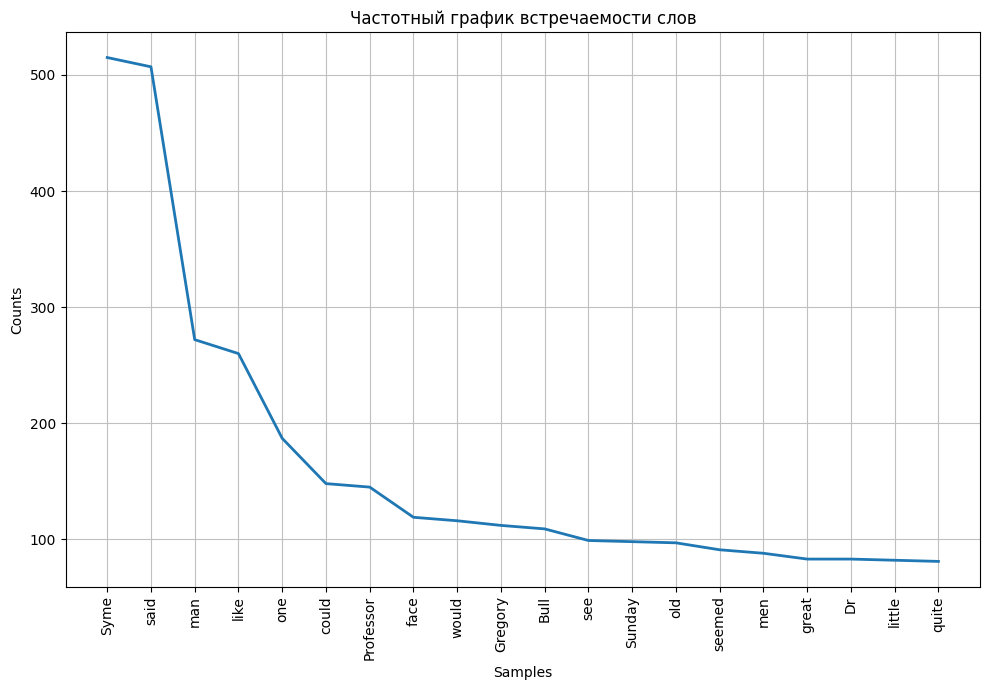

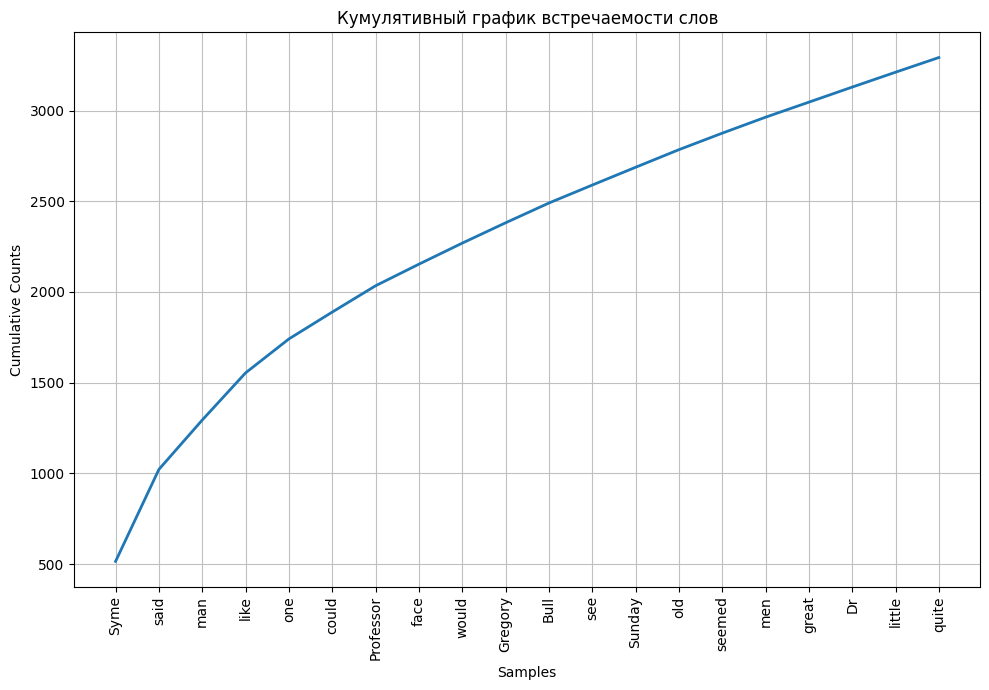

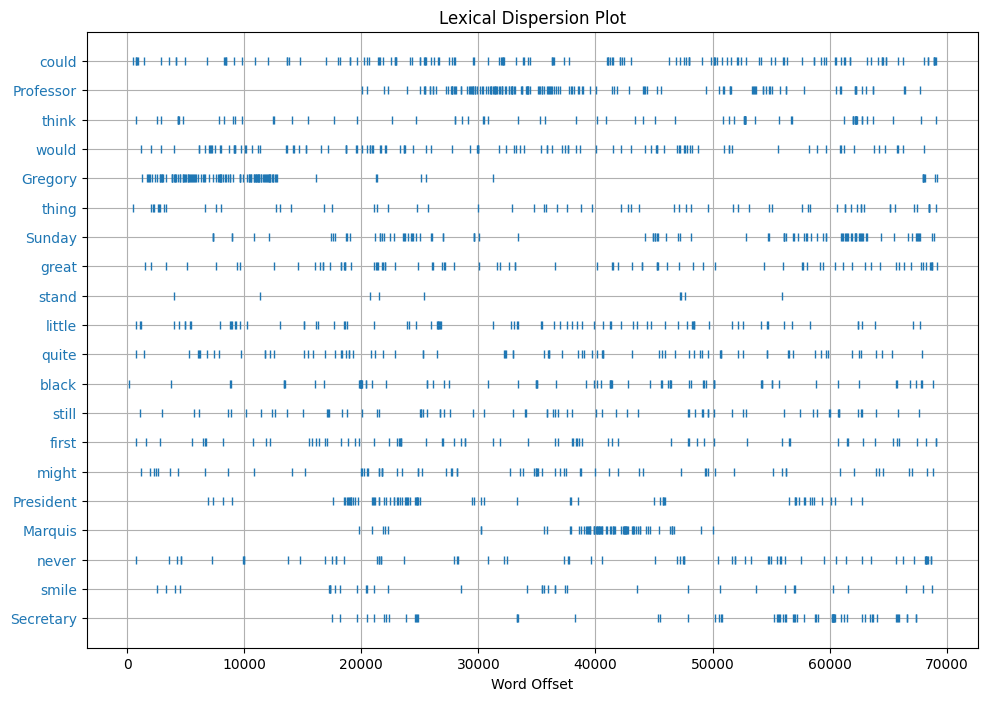

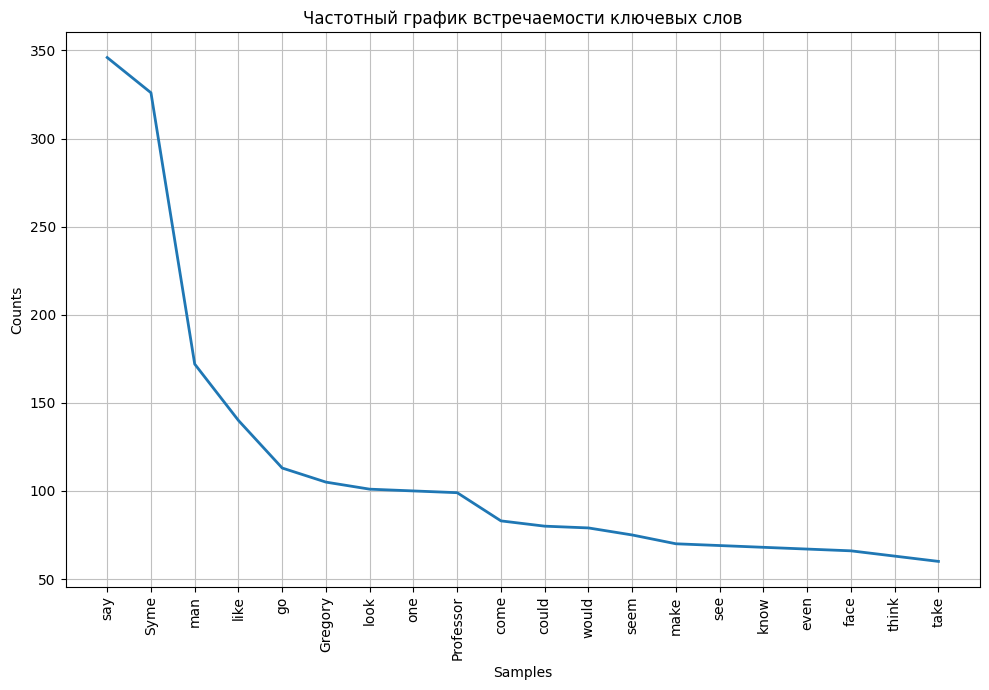

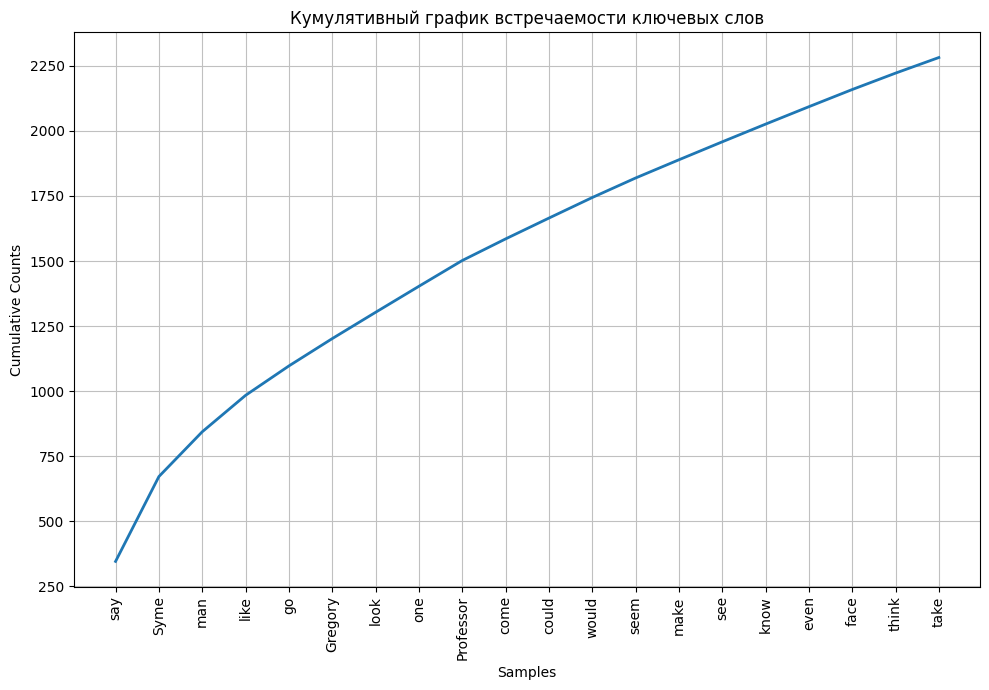

In [18]:
experiment_text_9(20)

## Этап II - сравнительный анализ нескольких корпусов
Проведём сравнительный анализ двух произведений: Роман Джейн Остин "Гордость и Предубеждение" и Роман Оскара Уайлда "Портрет Дориана Грея"

Так как анализ является сравнительным, то его результаты выведем в таблице

### Приведение своих корпуса к типу Text

In [19]:
pride_and_prejudice = Text(corpus.words('Pride_and_Prejudice.txt'))
the_picture_of_dorian_gray = Text(corpus.words('The_Picture_of_Dorian_Gray.txt'))

### Модуль анализа двух корпусов

In [20]:
def analyze_corpus(text_1:nltk_text_type, text_2:nltk_text_type):
    
    result_exp_text_1 = experiment(text_1)
    result_exp_text_2 = experiment(text_2)
    
    results = [result_exp_text_1, result_exp_text_2]
    
    analyze_data = []
    
    for analyze_text in results:
        analyze_data.append([
            analyze_text[1], # Длина текста
            analyze_text[2], # Слов в словаре
            analyze_text[3], # Мера лексического разнообразия
            len(analyze_text[4]), # Предложения
            len(analyze_text[5]), # Слова
            len(analyze_text[6]), # Слова без стопслов
            analyze_text[7], # Леммы
            analyze_text[8], # Часто встречающиеся леммы
            analyze_text[9], # Ключевые слова
            analyze_text[10], # Биграммы
            analyze_text[11], # Коллокации
        ])
        
    columns = ['Длина текста', 'Слов в словаре', 'Мера лексического разнообразия', 'Количество предложений', 'Количество слов', 'КОличество слов без стопслов', 'Леммы', 'Часто встречающиеся леммы', 'Ключевые слова', 'Биграммы', 'Коллокации']
    
    df = pd.DataFrame(analyze_data, columns=columns)
    
    df.rename(index={0: 'Pride and Prejudice', 1: 'The Picture of Dorian Gray'}, inplace=True)
        
    return results, df
    

### Получение результата корпусов

In [21]:
results, table = analyze_corpus(pride_and_prejudice, the_picture_of_dorian_gray)

## Вывод сравнительного анализа

In [22]:
table

,Длина текста,Слов в словаре,Мера лексического разнообразия,Количество предложений,Количество слов,КОличество слов без стопслов,Леммы,Часто встречающиеся леммы,Ключевые слова,Биграммы,Коллокации
Pride and Prejudice,145804,6911,0.047399,5812,123797,55960,"[Illustration, PRIDE, PREJUDICE, Chapter, trut...","[(Mr, 782), (Elizabeth, 634), (say, 609), (cou...","[Elizabeth, could, would, Darcy, Bennet, think...","[{('Mr', 'Darcy'): 273}, {('Mrs', 'Bennet'): 1...","[(Allen, _), (_Copyright, 1894), (De, Bourgh),..."
The Picture of Dorian Gray,95282,7317,0.076793,5488,80055,37004,"[CHAPTER, studio, fill, rich, odour, rose, lig...","[(Dorian, 414), (one, 403), (say, 392), (would...","[Dorian, would, Henry, thing, think, Harry, ne...","[{('Lord', 'Henry'): 226}, {('Dorian', 'Gray')...","[(Prince, Charming), (Good, bye), (Lady, Narbo..."


## Гордость и Предубеждение - графики

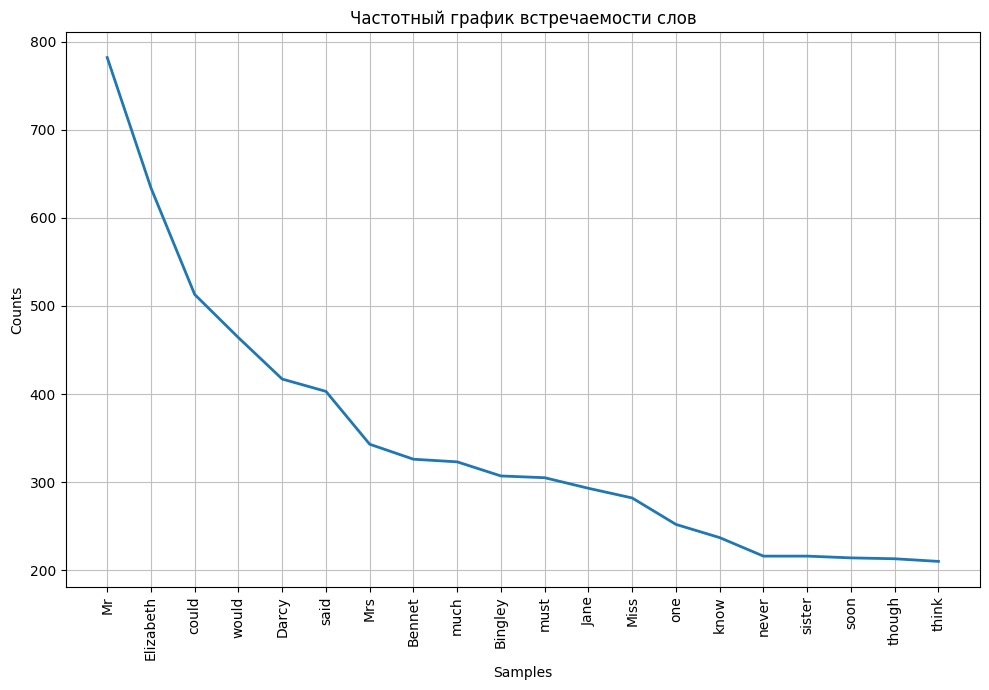

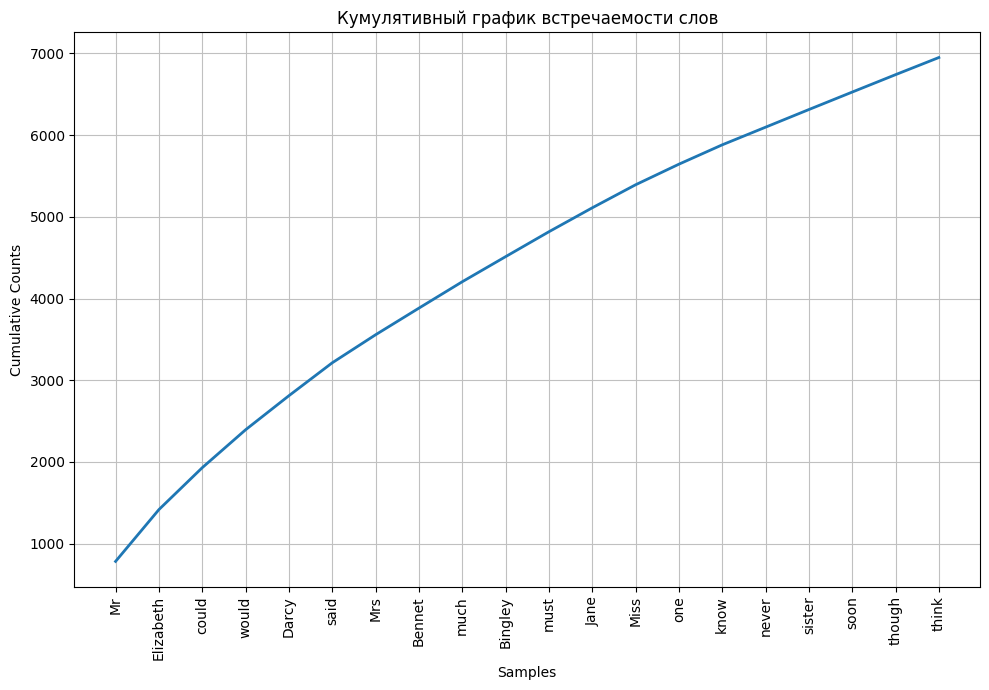

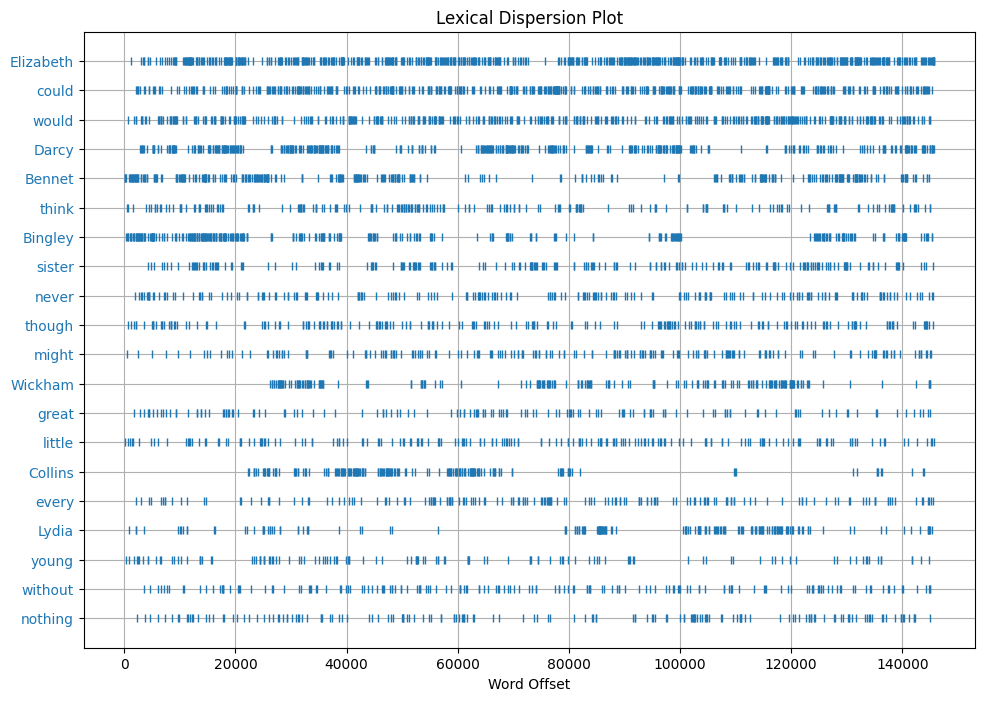

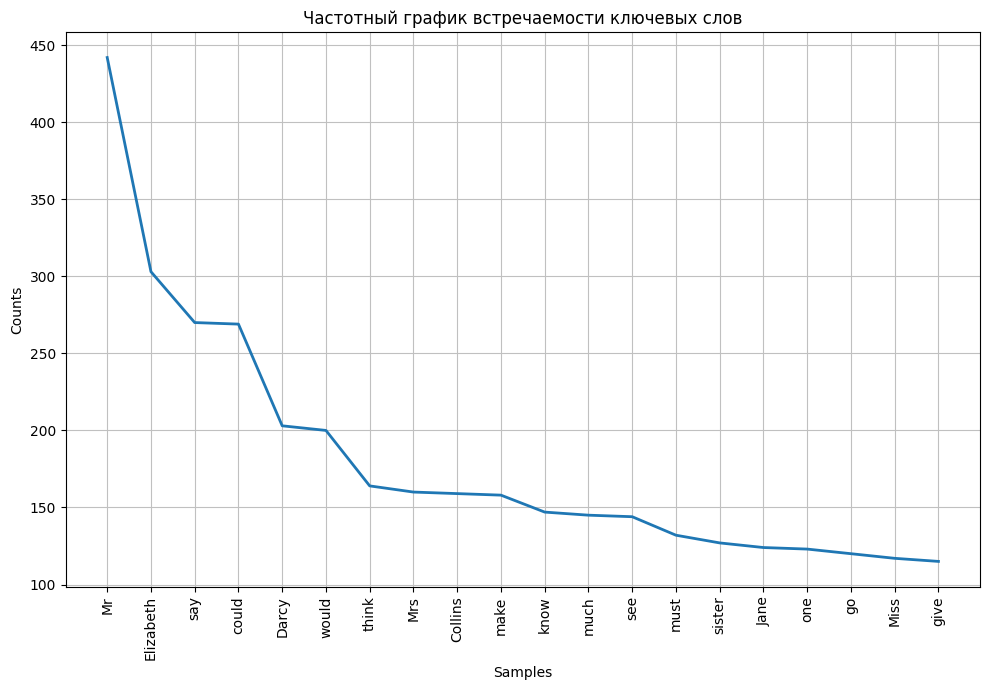

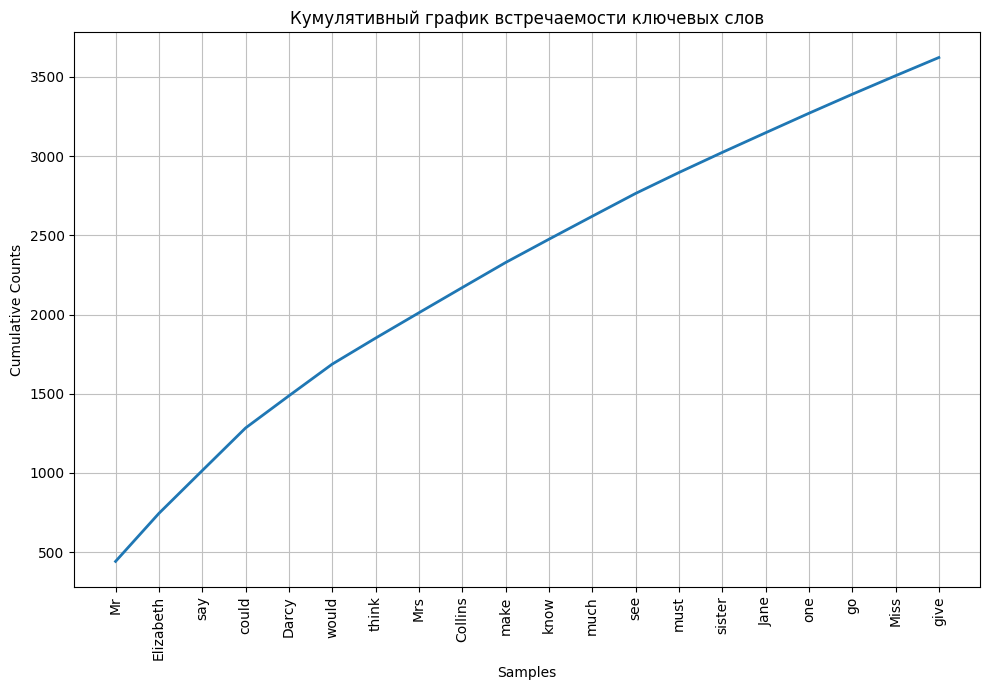

In [23]:
cumulative_graphs(results[0][6], n=20, is_cumulative=False, title='Частотный график встречаемости слов')
cumulative_graphs(results[0][6], n=20, title='Кумулятивный график встречаемости слов')

dispersion_graph(pride_and_prejudice, results[0][9])

cumulative_graph_key_words(pride_and_prejudice, 20000, 80000)

## Портрет Дориана Грея - графики

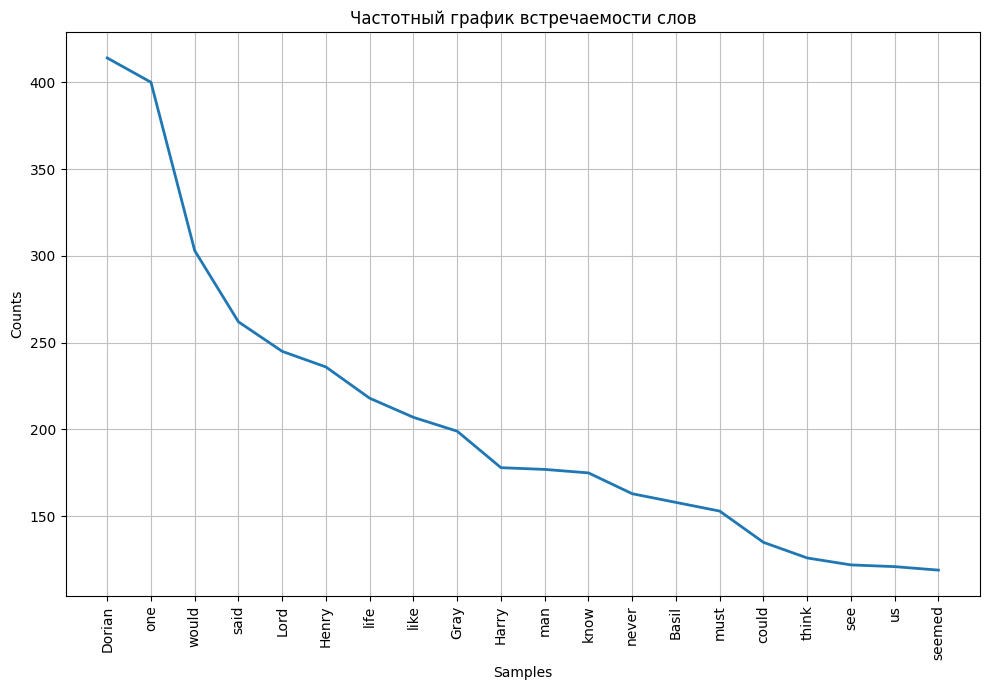

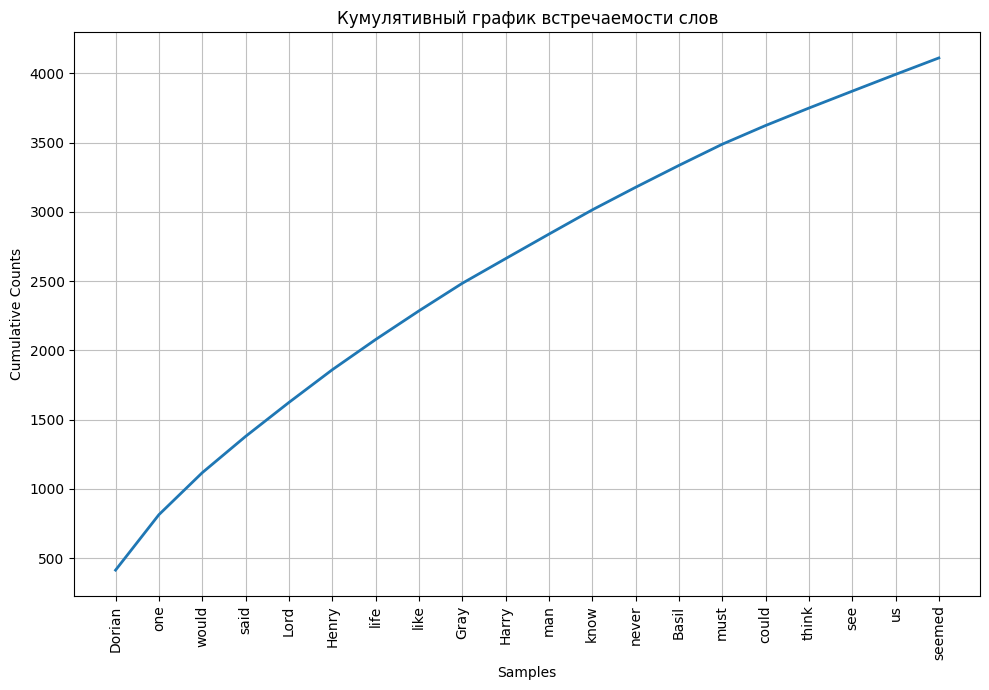

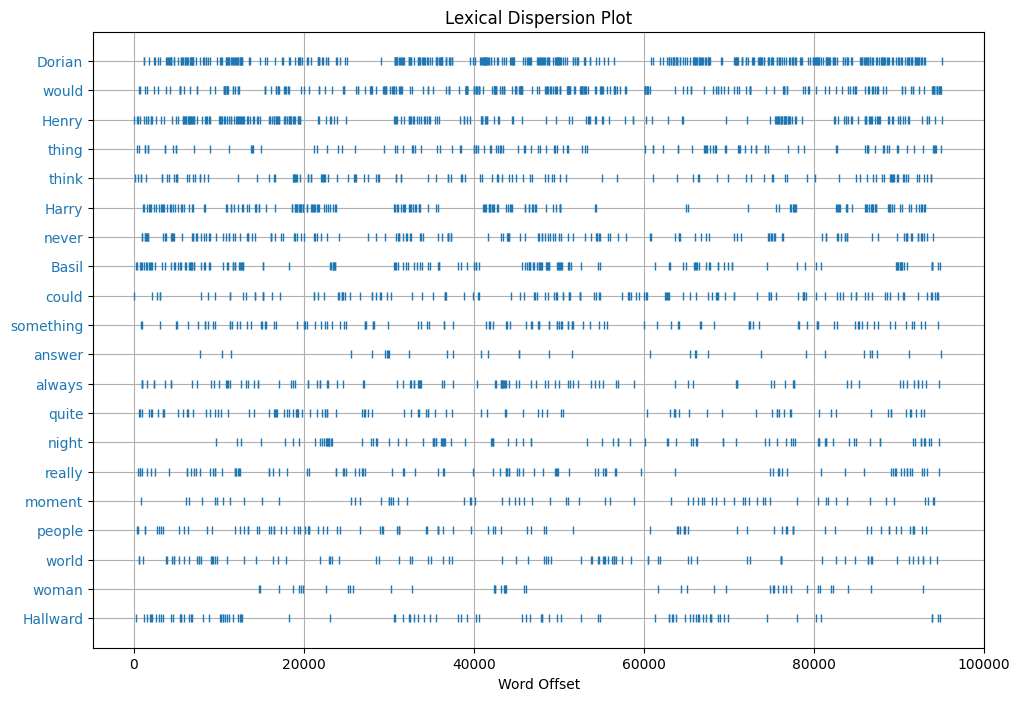

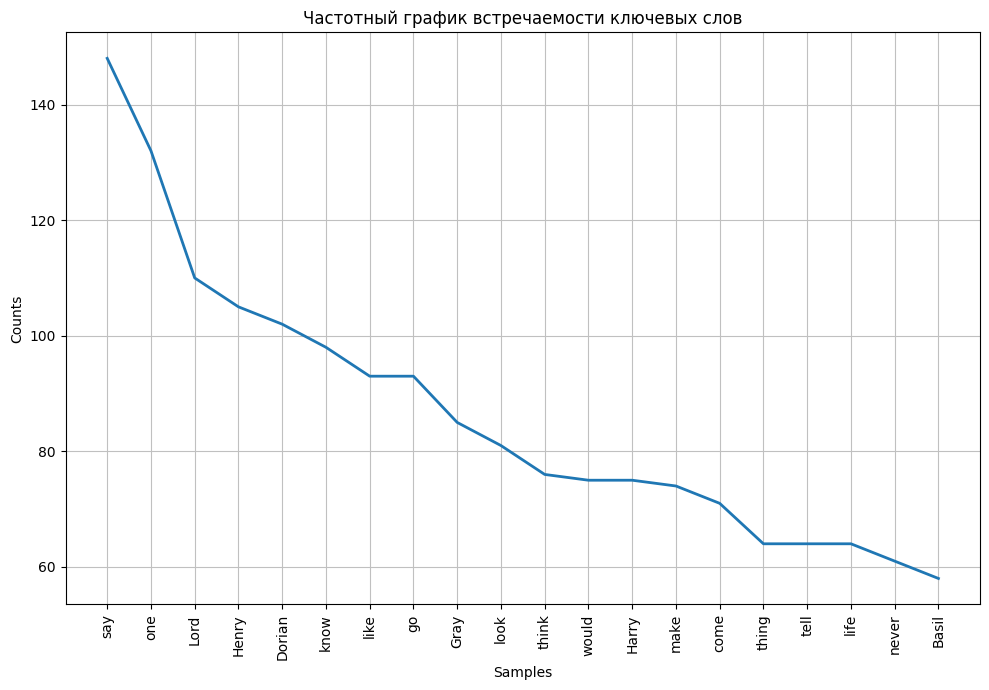

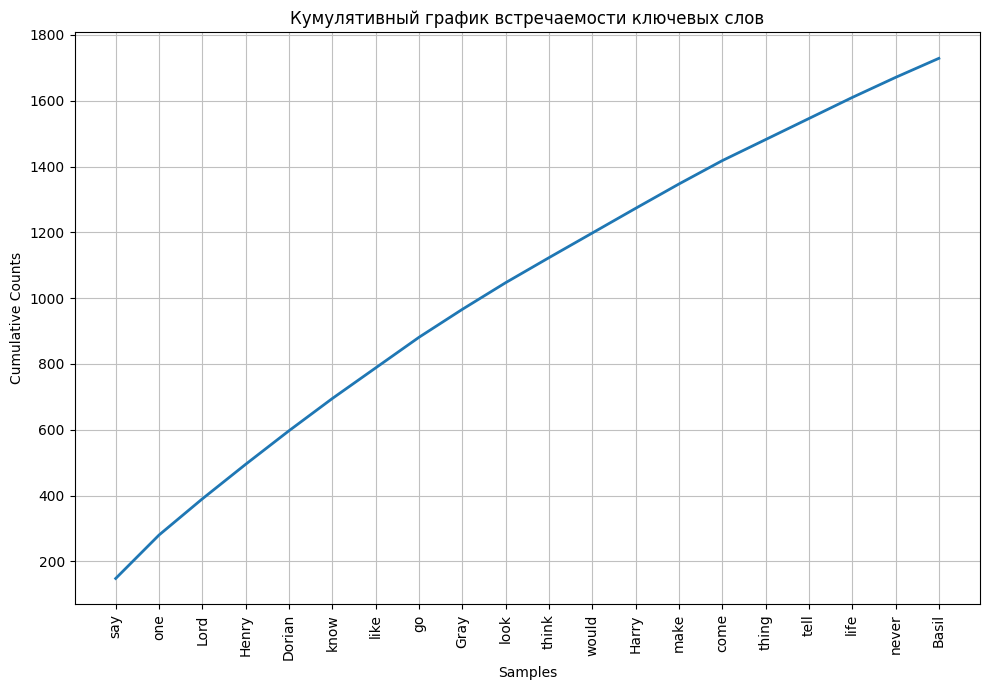

In [24]:
cumulative_graphs(results[1][6], n=20, is_cumulative=False, title='Частотный график встречаемости слов')
cumulative_graphs(results[1][6], n=20, title='Кумулятивный график встречаемости слов')

dispersion_graph(the_picture_of_dorian_gray, results[1][9])

cumulative_graph_key_words(the_picture_of_dorian_gray, 0, 25000)